In [8]:
#Defendencies
import pandas as pd
from pathlib import Path
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

pd.set_option('display.max_columns', None)

In [4]:
#Use Panda to read Data
crash_data = pd.read_csv("Cleaned_accidents_dataset.csv")
crash_data

,Incident_ID,Year,Street_Name,Cross_Street,Distance,Junction_Relation,Total_Injuries,Total_Fatalities,Injury_Severity,Collision_Manner,Light_Condition,Weather,Surface_Condition,Age_1,Gender_1,Travel_One,UnitAction_One,Violation1_Drv1,AlcoholUse_ 1,DrugUse_1,Age_2,Gender_2,TravelDirection_2,UnitAction_2,Violation_2,AlcoholUse_2,DrugUse_2,Latitude,Longitude,Date,Time
0,3462432,2019,Broadway Rd,Mill Ave,-100.0,Not Junction Related,0.0,0.0,No Injury,Sideswipe Same Direction,Dark Lighted,Cloudy,Wet,36.0,Male,East,Changing Lanes,Failed To Keep In Proper Lane,No Apparent Influence,No Apparent Influence,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.407390,-111.940150,2019-01-01,12:24:00
1,3470825,2019,Baseline Rd,I-10 Exit 155 C2-Ramp,0.0,Intersection 201,0.0,0.0,No Injury,Angle - Other Than Left Turn 2,Daylight,Rain,Dry,27.0,Male,North,Going Straight Ahead,Unknown,No Apparent Influence,No Apparent Influence,78.0,Female,North,Making Right Turn,Unknown,No Apparent Influence,No Apparent Influence,33.378300,-111.967380,2019-01-01,18:39:00
2,3478968,2019,University Dr,Rural Rd,200.0,Not Junction Related,0.0,0.0,No Injury,Left Turn,Dusk,Clear,Dry,28.0,Male,East,Making Left Turn,Failed To Yield Right Of Way,No Apparent Influence,No Apparent Influence,26.0,Male,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.422030,-111.925660,2019-01-02,01:14:00
3,3470739,2019,McClintock Dr,Baseline Rd,0.0,Intersection 4 Way 202,0.0,0.0,No Injury,Left Turn,Dark Lighted,Clear,Dry,72.0,Female,South,Going Straight Ahead,Disregarded Traffic Signal,No Apparent Influence,No Apparent Influence,36.0,Female,West,Making Left Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.378420,-111.909260,2019-01-02,02:22:00
4,3470724,2019,Baseline Rd,Price Rd,-29.0,Intersection Related 206,0.0,0.0,No Injury,Rear End,Daylight,Clear,Dry,36.0,Male,East,Making Right Turn,Followed Too Closely,No Apparent Influence,No Apparent Influence,62.0,Male,East,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.378460,-111.893710,2019-01-02,18:54:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7585,4017365,2022,Broadway Rd,Hardy Dr,-74.0,Intersection Related 206,0.0,0.0,No Injury,Rear End,Dusk,Cloudy,Dry,19.0,Male,East,Going Straight Ahead,Followed Too Closely,No Apparent Influence,No Apparent Influence,28.0,Male,East,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.407394,-111.952407,2022-12-31,01:48:00
7586,4047744,2022,Ash Ave,Rio Salado Pkwy,-15.0,Not Junction Related,0.0,0.0,No Injury,Sideswipe Opposite Direction,Dark Lighted,Clear,Dry,17.0,Female,South,Making Right Turn,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,47.0,Male,North,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.431508,-111.943378,2022-12-31,05:08:00
7587,4017542,2022,Elliot Rd,Harl Ave,0.0,Intersection 4 Way 202,0.0,0.0,No Injury,Left Turn,Unknown 51,Unknown,Dry,28.0,Male,East,Making Left Turn,Failed To Yield Right Of Way,No Apparent Influence,No Apparent Influence,50.0,Male,West,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.349081,-111.965928,2022-12-31,15:47:00
7588,4017552,2022,Mill Ave,Southern Ave,100.0,Driveway Or Alley,0.0,0.0,No Injury,Other,Daylight,Clear,Dry,23.0,Male,East,Backing,Other,No Apparent Influence,No Apparent Influence,46.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.393137,-111.939610,2022-12-31,21:55:00


---

The pie chart provides a clear visual representation of the distribution of accidents across 2019-2022. The dataset reveals a notable increase in the percentage of suspected injuries during the year 2019. It suggests a potential correlation between the pandemic and the frequency of suspected injuries.

---

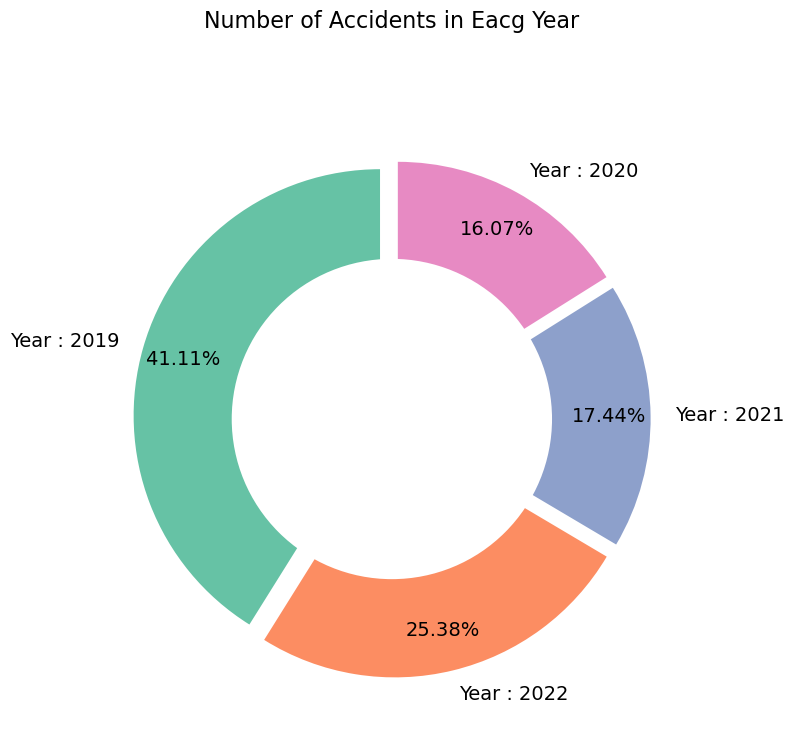

In [11]:
year_counts = crash_data['Year'].value_counts()
years_labels = ["Year : " + str(year) for year in year_counts.index]

# Create a pie chart 
plt.figure(figsize=(8,8))
plt.pie(year_counts, labels=years_labels, 
    autopct='%1.2f%%',
       textprops={'fontsize': 14},
       pctdistance=0.83,
       colors= sns.color_palette('Set2'), 
       startangle=90,
       explode=[0.05, 0.05, 0.05, 0.05])
plt.title(
    label="Number of Accidents in Each Year",
    fontdict={"fontsize": 16},
    pad=60
)

hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.show()

---

The pie chart visually represents the proportion of different injury severity categories in the dataset. The percentage reveals that  1% of the total injuries are classified as "Suspected Serious Injuries." This finding indicates a proportionate distribution of suspected injuries among the recorded incidents.  

---

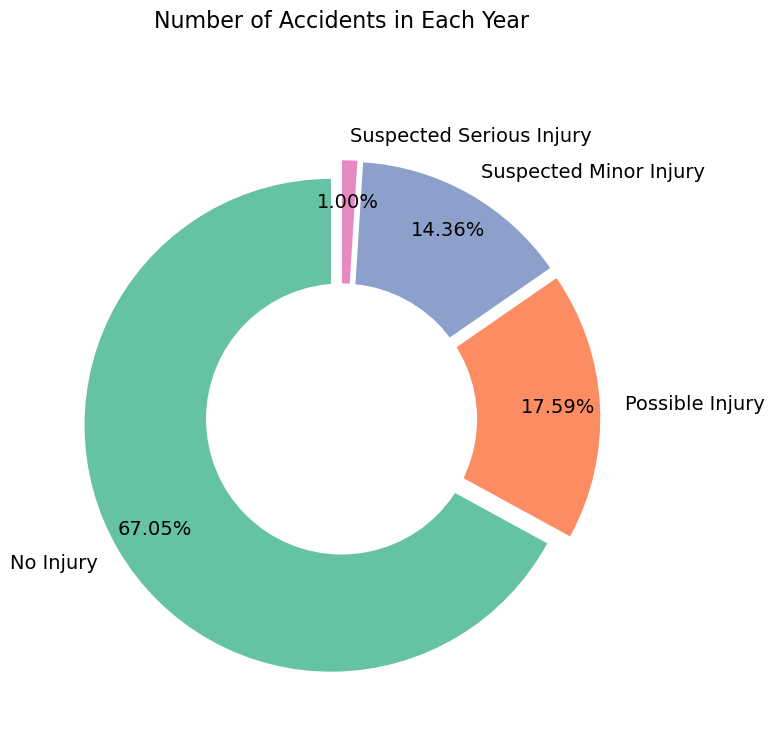

In [14]:
injury_Severity = crash_data['Injury_Severity'].value_counts()

# Create a pie chart 
plt.figure(figsize=(8,8))
plt.pie(injury_Severity, labels=injury_Severity.index, 
    autopct='%1.2f%%',
       textprops={'fontsize': 14},
       pctdistance=0.83,
       colors= sns.color_palette('Set2'), 
       startangle=90,
       explode=[0.05, 0.05, 0.05, 0.05])
plt.title(
    label="Number of Accidents in Each Year",
    fontdict={"fontsize": 16},
    pad=60
)

hole = plt.Circle((0, 0), 0.55, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.show()

---

This visual represents the relationship between weather condition and collision manner, this countplot provides a visually compelling representation of the interplay between weather conditions and collision manner. The findings can inform decision-making processes related to road safety, emergency preparedness, and targeted interventions based on specific weather scenarios. 

---

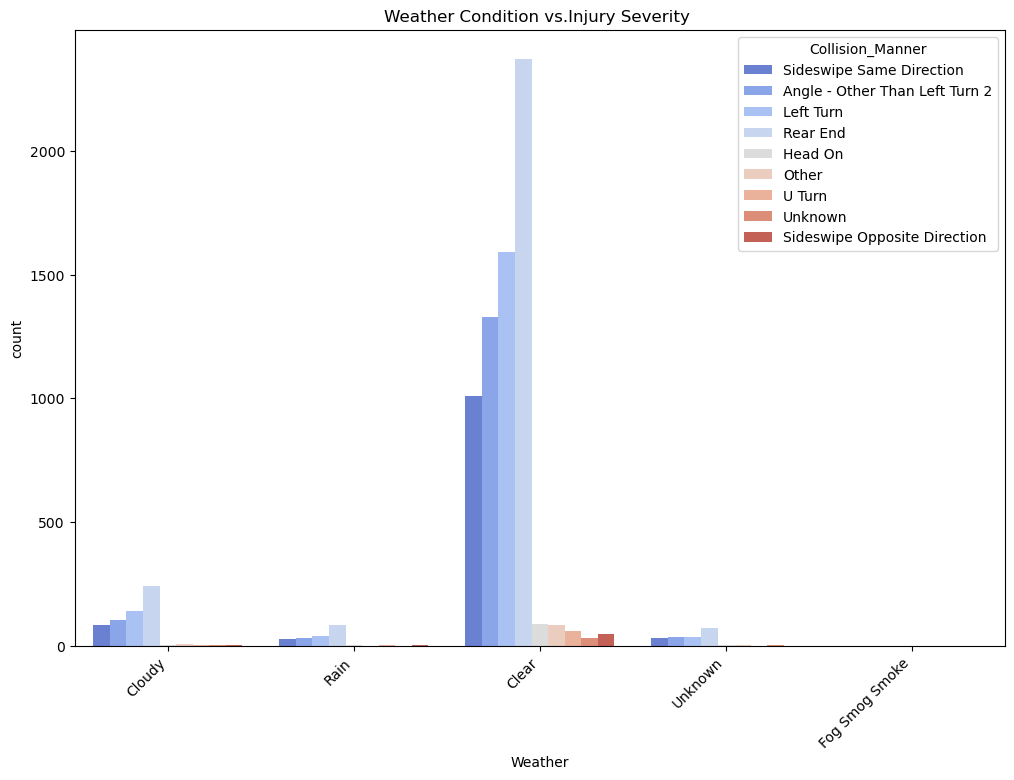

In [19]:
plt.figure(figsize=(12,8))
sns.countplot(x='Weather', hue='Collision_Manner', data=crash_data, palette ='coolwarm')
plt.title('Weather Condition vs.Injury Severity ')
plt.xticks(rotation=45, ha='right')
plt.show()

---

This visualization serves as an exploratory analysis tool engaging perspective on the age distribution of drivers, contributing valuable insights to the broader analysis of road safety and driver demographics.

In analyzing the age distribution of drivers in our dataset, we observe a distribution that approximately resembles a bell curve. The symmetry of the curve suggests that the majority of drivers cluster around the average age, with a gradual decrease in frequency as we move away from the mean.

---

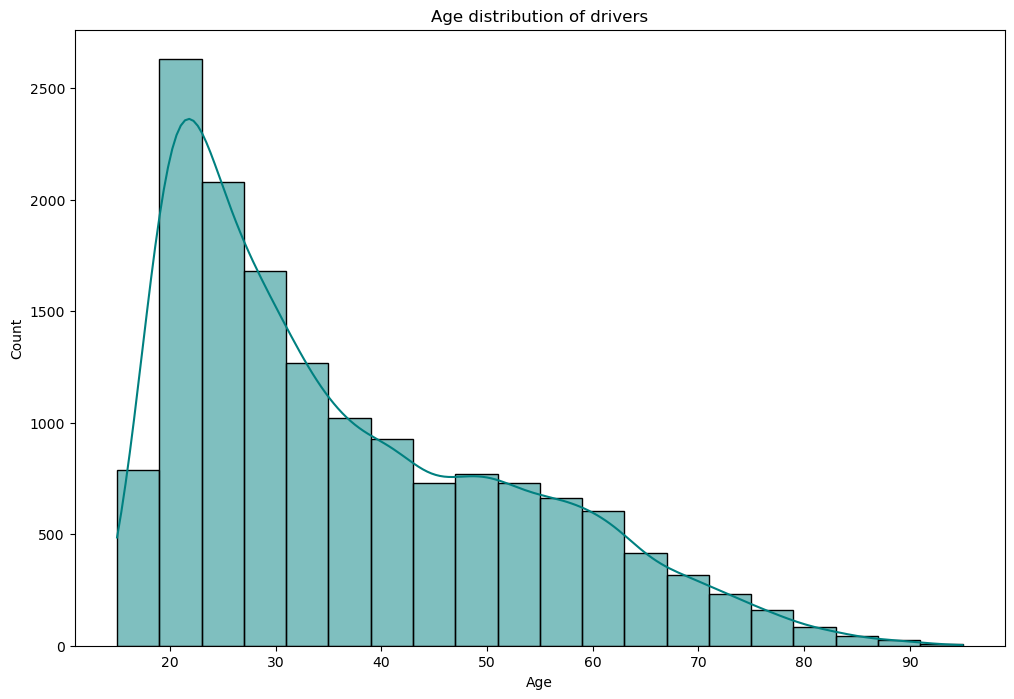

In [28]:
plt.figure(figsize=(12,8))
sns.histplot(crash_data[['Age_1', 'Age_2']].stack(), color='teal', bins=20, kde=True)
plt.title('Age distribution of drivers')
plt.xlabel('Age')
plt.show()

---

Positive correlations (values close to 1) suggest that as one variable increases, the other tends to increase as well.
Negative correlations (values close to -1) indicate that as one variable increases, the other tends to decrease.

---

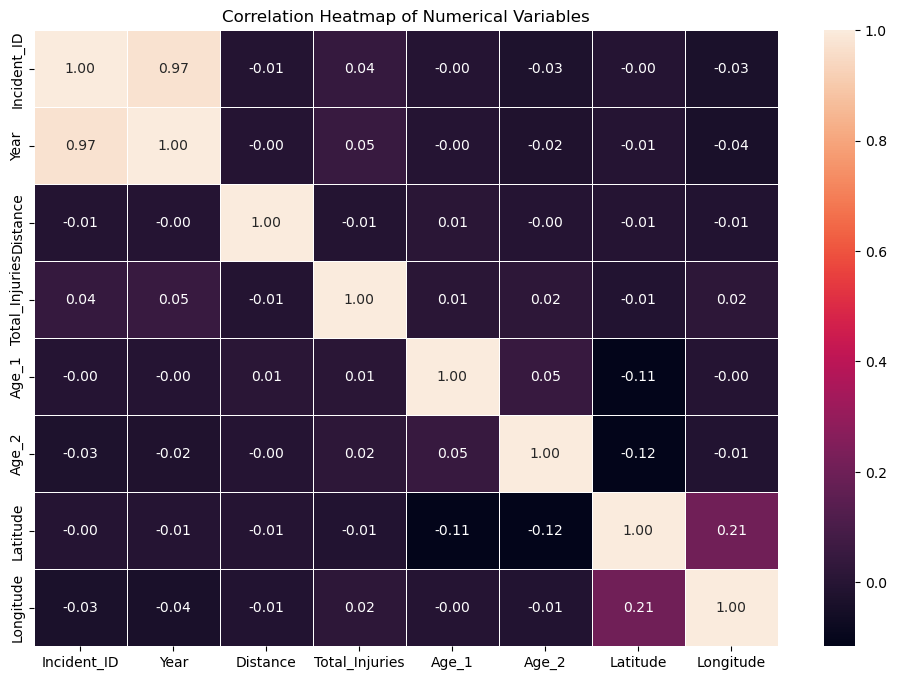

In [35]:
numerical_columns = crash_data.select_dtypes(include='number')
numerical_columns.drop(columns=['Total_Fatalities'], inplace=True)
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()